# Hierarchical clustering

## Hierarchical clustering of the grain data
In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.



* Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument.
* Assign the result to mergings.
* Plot a dendrogram using the dendrogram() function on mergings. Specify the keyword arguments labels=varieties, leaf_rotation=90, and leaf_font_size=6.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np


# Read txt file (tab or multiple spaces separated)
samples_label_varieties = pd.read_csv("/kaggle/input/seeds-uci-dataset/seeds_dataset.txt", sep=r"\s+", header=None)

# Drop rows with missing values (if any exist due to formatting issues)
samples_label_varieties = samples_label_varieties.dropna()

# Separate features and labels (last column is the "class" / variety)
X = samples_label_varieties.iloc[:, :-1]   # all columns except last (features)
varieties = samples_label_varieties.iloc[:, -1]  # last column (true class labels)

# Fit KMeans
model = KMeans(n_clusters=3, random_state=42)
labels = model.fit_predict(X)

# Build DataFrame
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
print(df.head())

   labels  varieties
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Grain measurements (length, width, etc.) – sample data
samples = np.array([
    [15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22],
    [14.88, 14.57, 0.8811, 5.554, 3.333, 1.018, 4.956],
    [14.29, 14.09, 0.905, 5.291, 3.337, 2.699, 4.825],
    [13.84, 13.94, 0.8955, 5.324, 3.379, 2.259, 4.805],
    [16.14, 14.99, 0.9034, 5.658, 3.562, 1.355, 5.175],
    [14.38, 14.21, 0.8951, 5.386, 3.312, 2.462, 4.956],
    [14.69, 14.49, 0.8799, 5.563, 3.259, 3.586, 5.219],
    [14.11, 14.26, 0.8722, 5.52, 3.168, 2.688, 5.219],
    [16.63, 15.46, 0.8747, 6.053, 3.465, 2.04, 5.877],
    [16.44, 15.25, 0.888, 5.884, 3.505, 1.969, 5.533],
    [15.26, 14.85, 0.8696, 5.714, 3.242, 4.543, 5.314],
    [14.03, 14.16, 0.8796, 5.438, 3.201, 1.717, 5.001],
    [13.89, 14.02, 0.888, 5.439, 3.199, 3.986, 4.738],
    [13.78, 14.06, 0.8759, 5.479, 3.156, 3.136, 4.872],
    [13.74, 14.05, 0.8744, 5.482, 3.114, 2.932, 4.825],
])

varieties = [
    'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
    'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
    'Canadian', 'Canadian', 'Canadian', 'Canadian', 'Canadian'
]


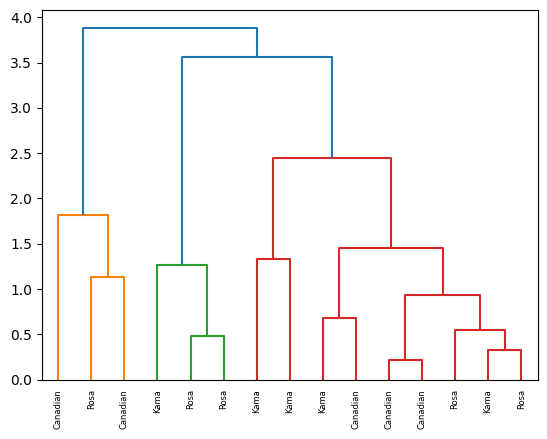

In [17]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot  as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


## Hierarchies of stocks
In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.


* Import normalize from sklearn.preprocessing.
* Rescale the price movements for each stock by using the normalize() function on movements.
* Apply the linkage() function to normalized_movements, using 'complete' linkage, to calculate the hierarchical clustering. * * Assign the result to mergings.
* Plot a dendrogram of the hierarchical clustering, using the list companies of company names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you did in the previous exercise.

In [ ]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings,
labels = companies,
leaf_rotation=90,
leaf_font_size=6)
plt.show()


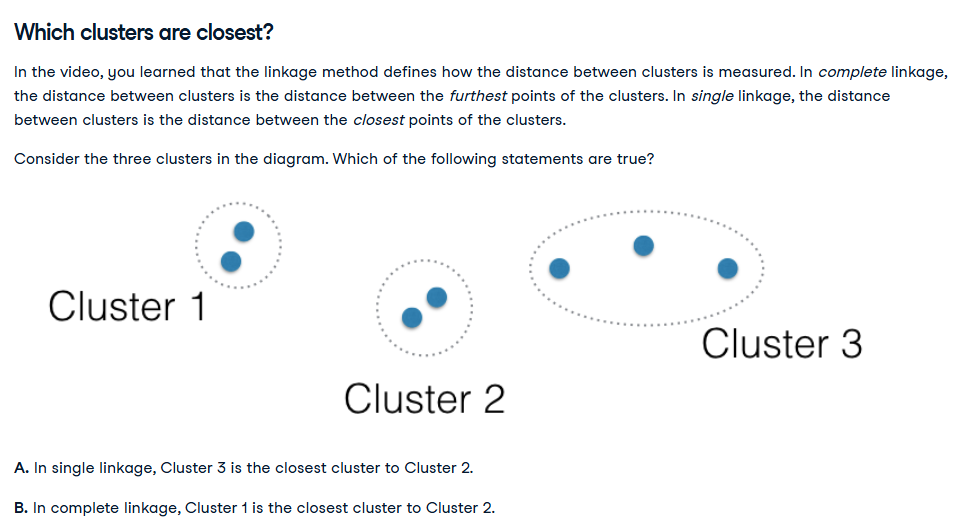

# Cluster labels in hierarchical clustering

## Different linkage, different hierarchical clustering!
In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. This dataset was obtained from Eurovision.


* Import linkage and dendrogram from scipy.cluster.hierarchy.
* Perform hierarchical clustering on samples using the linkage() function with the method='single' keyword argument. Assign the result to mergings.
* Plot a dendrogram of the hierarchical clustering, using the list country_names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you have done earlier.

In [10]:
samples = np.array([
    [2., 12., 0.,  5.,  7.,  0.,  6.,  0.,  0.,  6.,  0.,  8.],
    [12., 0.,  4.,  0., 10.,  0.,  8.,  2.,  5.,  0.,  6.,  3.],
    [0., 12., 3.,  4.,  0.,  6.,  0.,  8.,  4.,  7.,  0.,  5.],
    [10., 0.,  2.,  6.,  0.,  5.,  3.,  0.,  6.,  0.,  7.,  2.],
    [0.,  8.,  6.,  0.,  4.,  7.,  2.,  6.,  0.,  5.,  8.,  0.],
    [6.,  4.,  0., 12.,  0.,  8.,  0.,  3.,  5.,  0.,  6.,  7.],
    [8.,  5.,  6.,  0.,  7.,  0., 12.,  0.,  4.,  9.,  0.,  6.],
    [7.,  4.,  0.,  6.,  0.,  9.,  0., 12.,  5.,  0.,  8.,  0.],
    [0.,  6.,  8.,  0.,  6.,  7.,  0.,  5., 12.,  0.,  6.,  4.],
    [5.,  0.,  4.,  6.,  0.,  8.,  7.,  0.,  6., 12.,  0.,  5.],
    [8.,  5.,  6.,  0.,  7.,  0.,  6.,  9.,  0.,  7., 12.,  0.],
    [0.,  6.,  0.,  5.,  0., 12.,  0.,  5.,  6.,  0.,  5., 12.]
])

# Fake country names (one per row)
country_names = [
    "France", "Germany", "Italy", "Spain",
    "UK", "Norway", "Sweden", "Finland",
    "Poland", "Greece", "Turkey", "Russia"
]


[[ 2. 12.  0.  5.  7.  0.  6.  0.  0.  6.  0.  8.]
 [12.  0.  4.  0. 10.  0.  8.  2.  5.  0.  6.  3.]
 [ 0. 12.  3.  4.  0.  6.  0.  8.  4.  7.  0.  5.]
 [10.  0.  2.  6.  0.  5.  3.  0.  6.  0.  7.  2.]
 [ 0.  8.  6.  0.  4.  7.  2.  6.  0.  5.  8.  0.]
 [ 6.  4.  0. 12.  0.  8.  0.  3.  5.  0.  6.  7.]
 [ 8.  5.  6.  0.  7.  0. 12.  0.  4.  9.  0.  6.]
 [ 7.  4.  0.  6.  0.  9.  0. 12.  5.  0.  8.  0.]
 [ 0.  6.  8.  0.  6.  7.  0.  5. 12.  0.  6.  4.]
 [ 5.  0.  4.  6.  0.  8.  7.  0.  6. 12.  0.  5.]
 [ 8.  5.  6.  0.  7.  0.  6.  9.  0.  7. 12.  0.]
 [ 0.  6.  0.  5.  0. 12.  0.  5.  6.  0.  5. 12.]]


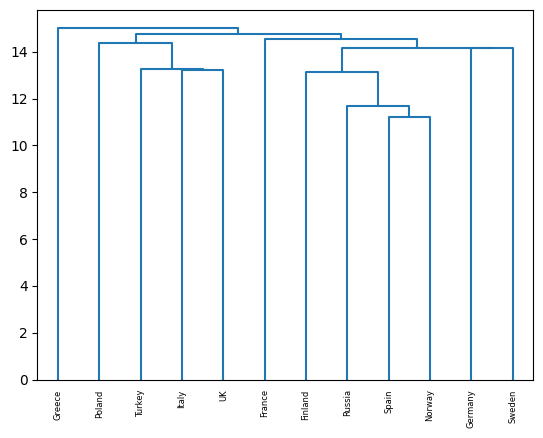

In [11]:
print(samples)

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names,
leaf_rotation=90, leaf_font_size=6)
plt.show()


## Extracting the cluster labels
In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.


* Perform a flat hierarchical clustering by using the fcluster() function on mergings. Specify a maximum height of 6 and the keyword argument criterion='distance'.
* Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
* Create a cross-tabulation ct between df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label.

In [18]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  Canadian  Kama  Rosa
labels                         
1                 5     5     5


In [19]:
print(len(labels), len(varieties))


15 15


# t-SNE visualization of grain dataset
In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.


* Import TSNE from sklearn.manifold.
* Create a TSNE instance called model with learning_rate=200.
* Apply the .fit_transform() method of model to samples. Assign the result to tsne_features.
* Select the column 0 of tsne_features. Assign the result to xs.
* Select the column 1 of tsne_features. Assign the result to ys.
* Make a scatter plot of the t-SNE features xs and ys. To color the points by the grain variety, specify the additional keyword argument c=variety_numbers.

In [21]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()


ValueError: perplexity must be less than n_samples

## A t-SNE map of the stock market
t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.


* Import TSNE from sklearn.manifold.
* Create a TSNE instance called model with learning_rate=50.
* Apply the .fit_transform() method of model to normalized_movements. Assign the result to tsne_features.
* Select column 0 and column 1 of tsne_features.
* Make a scatter plot of the t-SNE features xs and ys. Specify the additional keyword argument alpha=0.5.
* Code to label each point with its company name has been written for you using plt.annotate(), so just hit submit to see the visualization!

In [23]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


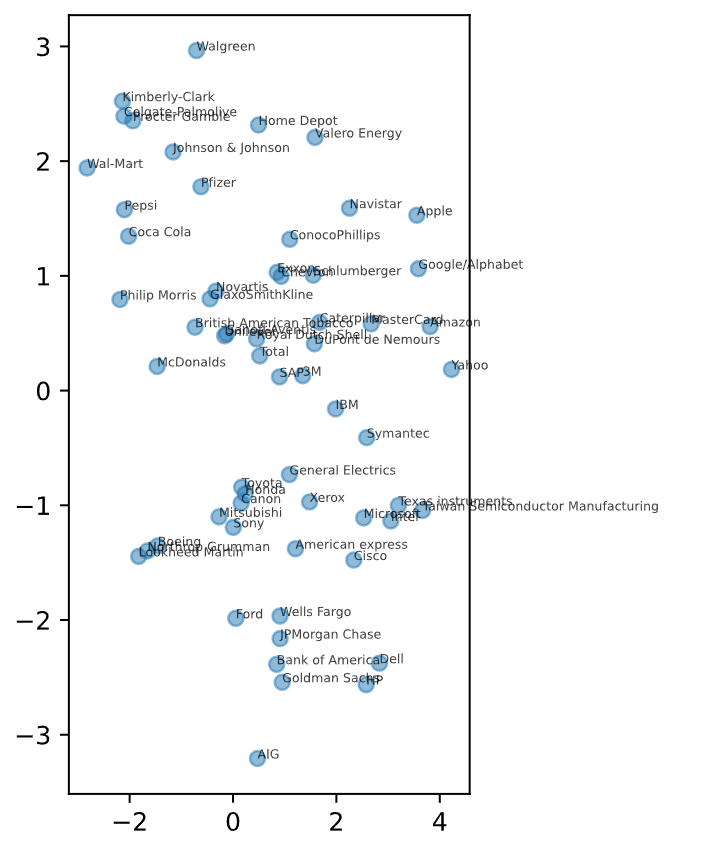